In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv('futures_data.csv', index_col = [0], parse_dates=['Date'])

In [2]:
import numpy as np

df['Sum'] = df[['Foreign', 'Dealer', 'Domestic']].sum(axis = 1)
df['Ratio'] = df['Sum'] / df['Total'] * -1

X = 0.2
Y = 0.05

In [3]:
def strategy(C, X = 0.2, Y = 0.05):
    if C > X:
        return -1
    elif C < Y:
        return 1
    else:
        return 0

In [4]:
df['Signal'] = df.Ratio.apply(strategy, X = 0.2, Y = 0.05)

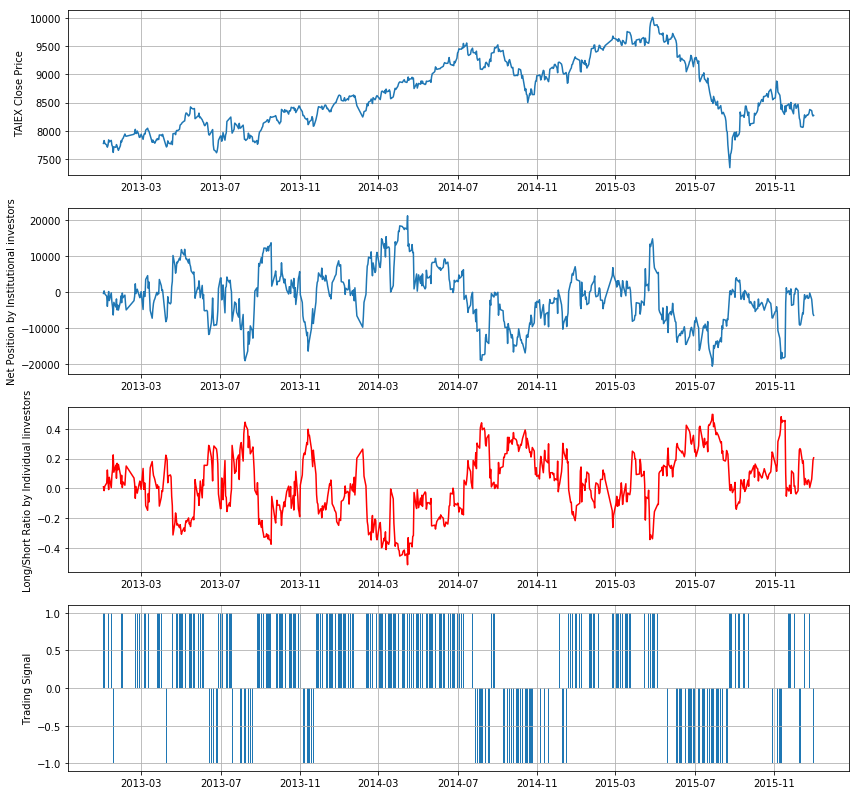

In [5]:
fig = plt.figure(figsize = (14, 14))

ax0 = fig.add_subplot(411)
ax0.plot(df['Close'])
ax0.grid(True)
ax0.set_ylabel('TAIEX Close Price')

ax1 = fig.add_subplot(412)
ax1.plot(df['Sum'])
ax1.grid(True)
ax1.set_ylabel('Net Position by Institutional investors')

ax2 = fig.add_subplot(413)
ax2.plot(df['Ratio'], color = 'r')
ax2.grid(True)
ax2.set_ylabel('Long/Short Ratio by Individual Iinvestors')

ax3 = fig.add_subplot(414)
plt.bar(df.index, df['Signal'])
ax3.grid(True)
ax3.set_ylabel('Trading Signal')

fig.show()

In [6]:
(rows, cols) = df.shape
df['Profit'] = np.zeros((rows, 1))

for i in range(0, rows - 2):
    df['Profit'][i] = df['Signal'][i] * (df['Open'][i + 2] - df['Open'][i + 1]) * 200

print(df[['Open', 'Ratio', 'Signal', 'Profit']][:10])

            Open     Ratio  Signal   Profit
Date                                       
2013-01-02  7720  0.009842       1  -2200.0
2013-01-03  7811 -0.015899       1 -11400.0
2013-01-04  7800  0.013126       1  -2200.0
2013-01-07  7743  0.035363       1  -9200.0
2013-01-08  7732  0.122904       0      0.0
2013-01-09  7686  0.049108       1  20200.0
2013-01-10  7762 -0.008646       1 -26600.0
2013-01-11  7863  0.073767       0      0.0
2013-01-14  7730  0.003946       1 -10000.0
2013-01-15  7800  0.085263       0      0.0


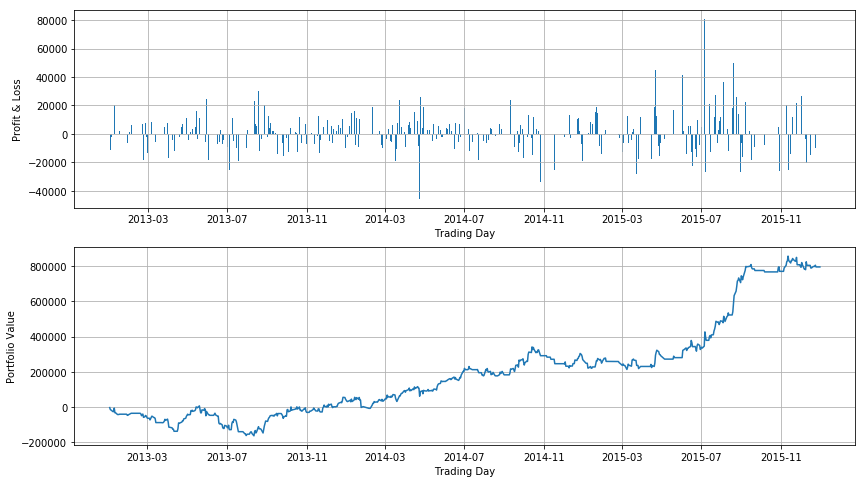

In [7]:
f = plt.figure(figsize = (14, 8))
ax1 = f.add_subplot(211)
ax1.bar(df.index, df['Profit'])
ax1.set_xlabel('Trading Day')
ax1.set_ylabel('Profit & Loss')
ax1.grid(True)

df['PV'] = df['Profit'].cumsum()

ax2 = f.add_subplot(212)
ax2.plot(df.index, df['PV'])
ax2.set_xlabel('Trading Day')
ax2.set_ylabel('Portfolio Value')
ax2.grid(True)

In [8]:
'''
Sharp=年化return/年化標準差
MDD =資產創新高後的最大回檔
MDD date
獲利能力 =total /mdd
總進出筆數
勝敗率
平均獲利
平均虧損
'''

'\nSharp=年化return/年化標準差\nMDD =資產創新高後的最大回檔\nMDD date\n獲利能力 =total /mdd\n總進出筆數\n勝敗率\n平均獲利\n平均虧損\n'

In [9]:
# return Sharpe ratio
def sharpe_ratio(returns, r_mean):
    (N, ) = returns.shape
    return (returns.mean() - r_mean) / returns.std() * np.sqrt(N)

# return mdd and the date of mdd
def mdd(returns):
    
    import datetime
    
    mdd = returns.min()
    (tmp, idx) = np.where(df == mdd)
    mdd_date = returns[idx].index
    
    return (mdd, mdd_date)

# return total / mdd
def profitability(total, mdd):
    return total / mdd

# return the turnover (the number of open/close)
def turnover(signals):
    # return np.sum(np.array(signals.diff() != 0))   
    pass

# return winning rate
def winning_rate(returns, N):
    pass

# return lossing rate
def lossing_rate(returns, N):
    pass

# return mean of profit and loss
def means(returns):
    pass

In [10]:
sharpe = sharpe_ratio(df['Profit'], df['Close'].diff().mean())
print(sharpe)

2.35207803620743


In [11]:
(mdd, mdd_date) = mdd(df['Profit'])
print('MDD: {} on {}'.format(mdd, mdd_date.format()))

MDD: -45400.0 on ['2013-01-16']


In [12]:
print(profitability(df['PV'][-1], -mdd))

17.524229074889867
